## Data modelling

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#load data
df = pd.read_csv('../data/cleaned/data_with_outliers.csv')

df

,sqft_above,sqft_lot15,sqft_living15,waterfront,view,condition,grade,bedrooms,bathrooms,sqft_basement_cat,floors,yr_built_cat,zip,price,bathrooms_cat
0,-0.74,-0.34,-1.04,0,0,3,7,3,1.00,1,1.00,1,1,221900,0
1,0.71,0.06,-0.29,0,0,3,7,3,2.25,2,2.00,1,1,538000,1
2,-1.88,0.13,1.12,0,0,3,6,2,1.00,1,1.00,1,0,180000,0
3,-1.04,-0.51,-0.99,0,0,5,7,4,3.00,3,1.00,1,1,604000,1
4,0.13,0.03,-0.10,0,0,3,8,3,2.00,1,1.00,1,0,510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.10,-2.41,-0.61,0,0,3,8,3,2.50,1,3.00,2,1,360000,1
21593,0.84,-0.02,-0.05,0,0,3,8,4,2.50,1,2.00,3,1,400000,1
21594,-1.12,-1.92,-1.98,0,0,3,7,2,0.75,1,2.00,2,1,402101,0
21595,0.01,-2.70,-0.88,0,0,3,8,3,2.50,1,2.00,2,0,400000,1


In [38]:
#drop bathrooms
df = df.drop([ 'bathrooms'], axis=1)

In [39]:
#define data
X = df.drop(['price'], axis=1)
y = df['price']

In [40]:
X.head()

,sqft_above,sqft_lot15,sqft_living15,waterfront,view,condition,grade,bedrooms,sqft_basement_cat,floors,yr_built_cat,zip,bathrooms_cat
0,-0.74,-0.34,-1.04,0,0,3,7,3,1,1.00,1,1,0
1,0.71,0.06,-0.29,0,0,3,7,3,2,2.00,1,1,1
2,-1.88,0.13,1.12,0,0,3,6,2,1,1.00,1,0,0
3,-1.04,-0.51,-0.99,0,0,5,7,4,3,1.00,1,1,1
4,0.13,0.03,-0.10,0,0,3,8,3,1,1.00,1,0,1


In [41]:
X.columns

Index(['sqft_above', 'sqft_lot15', 'sqft_living15', 'waterfront', 'view',
       'condition', 'grade', 'bedrooms', 'sqft_basement_cat', 'floors',
       'yr_built_cat', 'zip', 'bathrooms_cat'],
      dtype='object')

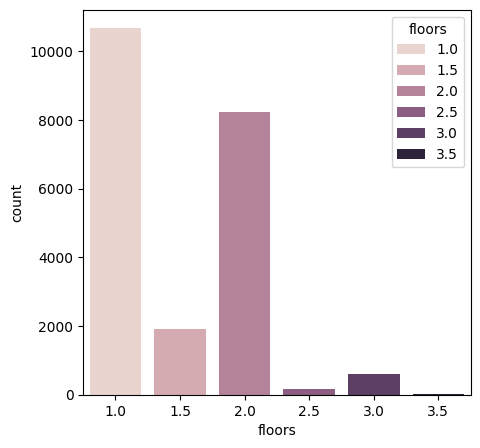

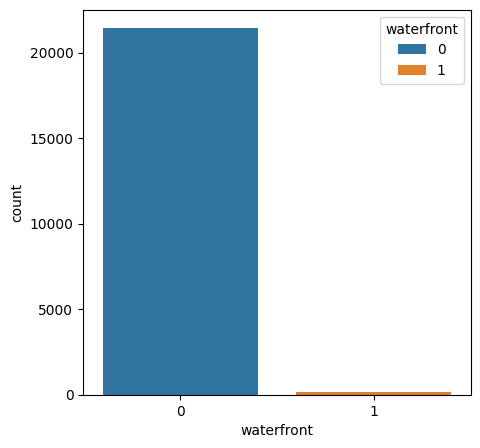

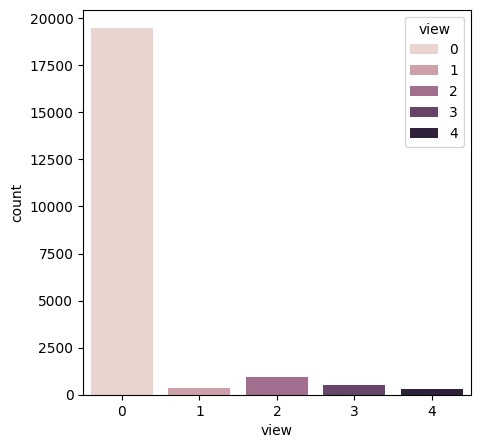

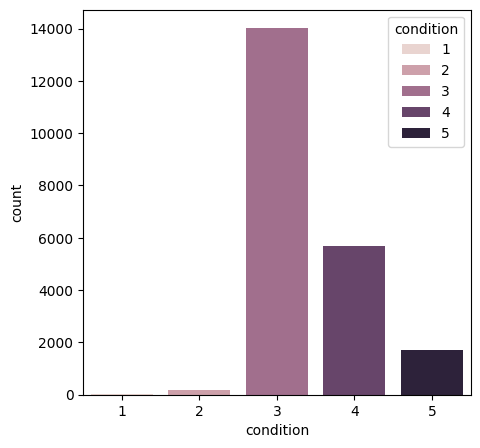

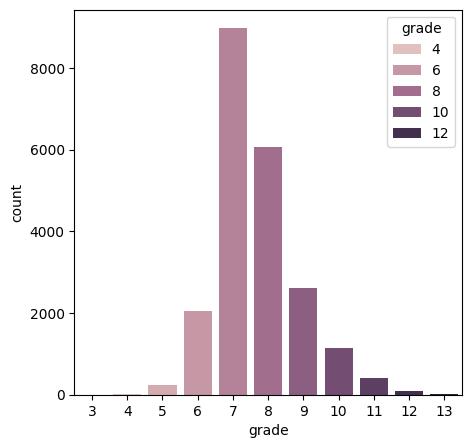

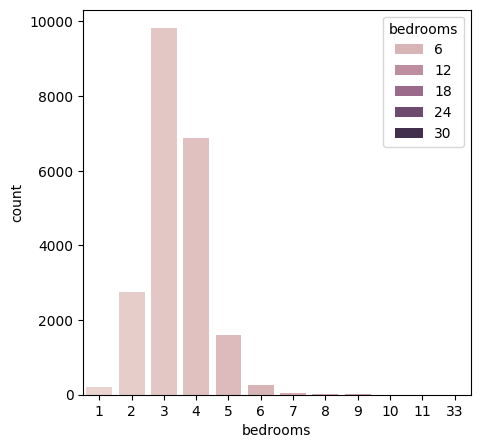

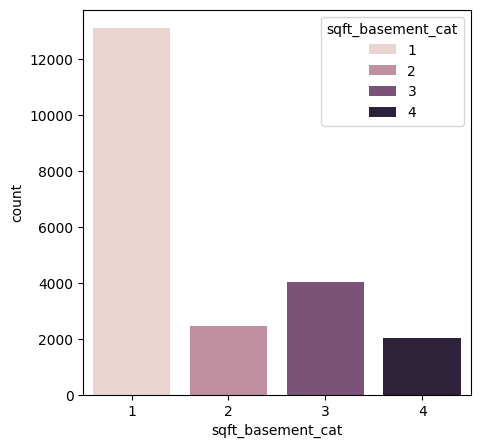

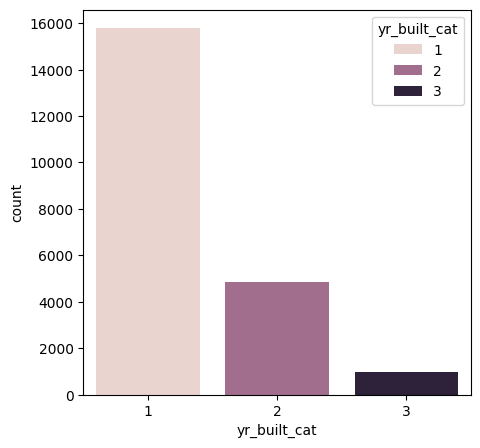

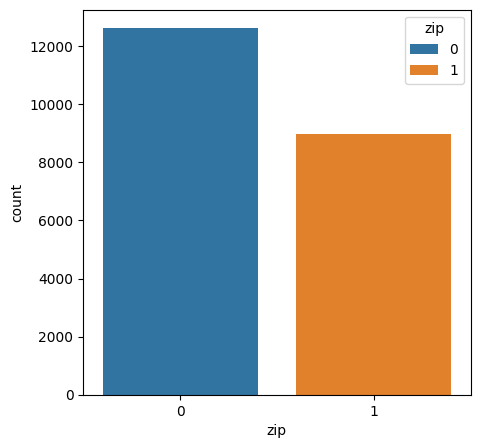

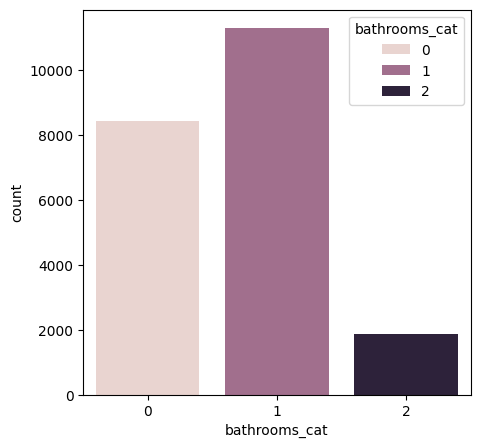

In [42]:
list_to = [ 'floors', 'waterfront','view','condition', 'grade', 'bedrooms', 'sqft_basement_cat', 'yr_built_cat','zip', 'bathrooms_cat']
#we are going to see value count in plot for these data

for i in list_to:
    plt.figure(figsize=(5,5))
    sns.countplot(x=i,hue=i, data=df)
    plt.show()



Now we are going to split the data into train and test set using sklearn, with test_size =0.3, and a random_state=42

In [43]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=42)

After our split,we will first convert to a datafram, ensure to minmax scale to reduce range of our training and test set before we fit our model

In [44]:
#convert train and test data to dataframe
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [45]:
#now to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train_df)


MinMaxScaler()

In [46]:
#save the scaler
import pickle
path="../scalers/"
scaler_file_name= "min_max_scaler_with_outliers.pkl"

with open(path + scaler_file_name, 'wb') as file:
    pickle.dump(scaler, file)

In [47]:
#transform the data
X_train_scaled = scaler.transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

#convert the scaled data to dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [48]:
X_train_scaled_df.head()

,sqft_above,sqft_lot15,sqft_living15,waterfront,view,condition,grade,bedrooms,sqft_basement_cat,floors,yr_built_cat,zip,bathrooms_cat
0,0.67,0.49,0.64,0.00,0.00,0.50,0.50,0.10,0.00,0.00,0.50,0.00,0.50
1,0.75,0.60,0.71,1.00,1.00,0.50,0.70,0.30,0.00,0.40,0.50,1.00,1.00
2,0.57,0.50,0.62,0.00,0.00,0.50,0.50,0.20,0.00,0.40,0.00,0.00,0.50
3,0.60,0.53,0.62,0.00,0.50,0.50,0.40,0.30,0.00,0.00,0.00,0.00,0.50
4,0.72,0.44,0.56,0.00,0.00,0.50,0.40,0.70,0.00,0.00,0.00,0.00,0.50


In [49]:
X_train_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,15117.00,0.55,0.13,0.00,0.46,0.54,0.65,1.00
sqft_lot15,15117.00,0.51,0.13,0.00,0.45,0.51,0.56,1.00
sqft_living15,15117.00,0.64,0.11,0.00,0.56,0.63,0.72,1.00
waterfront,15117.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,15117.00,0.06,0.19,0.00,0.00,0.00,0.00,1.00
condition,15117.00,0.60,0.16,0.00,0.50,0.50,0.75,1.00
grade,15117.00,0.47,0.12,0.00,0.40,0.40,0.50,1.00
bedrooms,15117.00,0.24,0.09,0.00,0.20,0.20,0.30,1.00
sqft_basement_cat,15117.00,0.26,0.35,0.00,0.00,0.00,0.67,1.00
floors,15117.00,0.20,0.22,0.00,0.00,0.20,0.40,1.00


Now to build the model, we will use Linear regression because we are meant to predict price of the real estate .
Linear regression is great for price prediction as it predicts numerical values

In [50]:
#now to build the model
from sklearn.linear_model import LinearRegression

In [51]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled_df, y_train)

LinearRegression()

In [52]:
#save model
path="../models/"
model_file_name= "linear_model_with_outliers.pkl"

with open(path + model_file_name, 'wb') as file:
    pickle.dump(linear_model, file)

Evaluate model
we will compare against real value and then subsequently we will check with metrics such as accuracy score etc

In [53]:
y_train_pred = linear_model.predict(X_train_scaled_df)
y_test_pred = linear_model.predict(X_test_scaled_df)

In [54]:
y_train_pred = [round(value, 2) for value in y_train_pred]
y_test_pred= [round(value, 2) for value in y_test_pred]

# Create a dictionary with the results
results = {
    "Set": ["Train"] * len(X_train) + ["Test"] * len(X_test),
    "Real": list(y_train) + list(y_test),
    "Predicted": y_train_pred + y_test_pred
}

# Create the results DataFrame
results_df = pd.DataFrame(results)


In [55]:
results_df

,Set,Real,Predicted
0,Train,699800,538574.31
1,Train,1700000,1896274.78
2,Train,258000,491382.66
3,Train,245000,475366.12
4,Train,373000,389843.73
...,...,...,...
21592,Test,1010000,844198.56
21593,Test,675000,1020878.74
21594,Test,442500,309030.72
21595,Test,424950,540808.69


In [56]:
#show error
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
display(results_df)

,Set,Real,Predicted,Errors
0,Train,699800,538574.31,161225.69
1,Train,1700000,1896274.78,-196274.78
2,Train,258000,491382.66,-233382.66
3,Train,245000,475366.12,-230366.12
4,Train,373000,389843.73,-16843.73
...,...,...,...,...
21592,Test,1010000,844198.56,165801.44
21593,Test,675000,1020878.74,-345878.74
21594,Test,442500,309030.72,133469.28
21595,Test,424950,540808.69,-115858.69


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [58]:
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
   The error metrics report function calculates for regression.

    Parameters:
    - y_real_train (list): The actual target values for the training dataset.
    - y_real_test (list): The actual target values for the testing dataset.
    - y_pred_train (list): The predicted target values for the training dataset.
    - y_pred_test (list): The predicted target values for the testing dataset.

    Returns:
    - metrics_df (DataFrame): A Pandas DataFrame containing error metrics for both the training and testing datasets.
    - 'Metric' (str): The name of the error metric.
    - 'Training Set' (float): The error metric value for the training set.
    - 'Testing Set' (float): The error metric value for the testing set.
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric":['MAE', 'MSE', 'RMSE', 'R2'] , 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))


    return results_df

In [59]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

,Metric,Train,Test
0,MAE,150163.00,150387.10
1,MSE,55077000927.80,58684074906.26
2,RMSE,55077000927.80,58684074906.26
3,R2,0.59,0.56


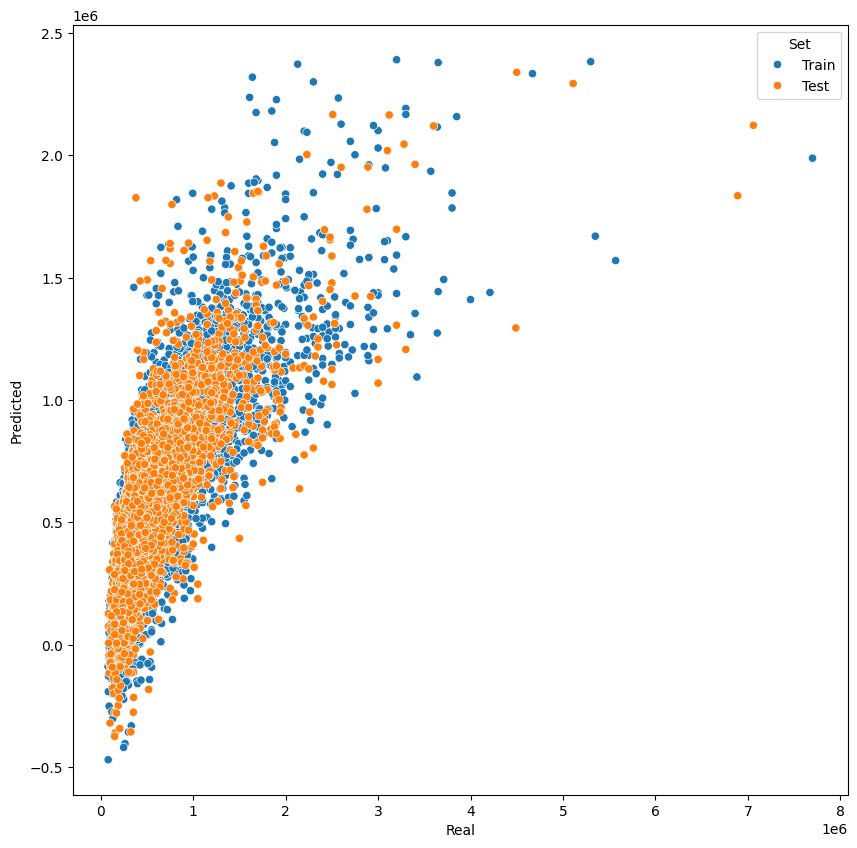

In [64]:
#seaborn scatter plot comparing the real and predicted values, set different colours for real and predicted values
plt.figure(figsize=(10, 10))
sns.scatterplot(x="Real", y="Predicted", hue="Set", data=results_df)
plt.show()